In [1]:
import pandas as pd
from pandas import read_csv
import os
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

os.chdir('/Users/xiaodanxu/Library/CloudStorage/GoogleDrive-arielinseu@gmail.com/My Drive/GEMS/BILD-AQ')

plt.style.use('ggplot')
sns.set(font_scale=1.4)  # larger font
m_to_mi = 0.000621371
m2_to_km2 = 1/1000000

In [2]:
spillover_od_df = read_csv('DestinationChoice/NHTS_home_based_spillover_trips.csv')
print(len(spillover_od_df))
spillover_od_df = spillover_od_df[['populationGroupType',
                                   'orig_geoid', 'orig_st_code', 
                                  'dest_geoid', 'dest_st_code', 
                                   'o_geoid', 'd_geoid',
                                  'wtperfin', 'trpmiles']]

spillover_od_df = spillover_od_df.loc[spillover_od_df['trpmiles'] <= 300]
print(len(spillover_od_df))
spillover_od_df.head(5)

6126
5772


,populationGroupType,orig_geoid,orig_st_code,dest_geoid,dest_st_code,o_geoid,d_geoid,wtperfin,trpmiles
0,medium-income,54069001800,WV,42003414102,PA,5.406900e+10,4.200341e+10,1487.848988,65.588
1,medium-income,54069001800,WV,42125752700,PA,4.212575e+10,5.406900e+10,1487.848988,27.048
2,high-income,46127020300,SD,19193000700,IA,4.612702e+10,1.919300e+10,402.708970,6.513
3,high-income,46127020300,SD,19193000700,IA,1.919300e+10,4.612702e+10,402.708970,6.517
4,high-income,45003021203,SC,13245011000,GA,4.500302e+10,1.324501e+10,61.059184,19.476


In [3]:
# Load route inputs
nhts_routes_df = read_csv('data/Network/combined/nhts_thru_lengths_ordered_ccst_transp_geo_with_imputation.csv')
# spillover_od_df = read_csv('data/Network/combined/NHTS_nonhome_OD_spillover.csv')
print(len(nhts_routes_df))
nhts_routes_df = pd.merge(nhts_routes_df, spillover_od_df,
                          on = ['o_geoid', 'd_geoid'], how = 'inner')
nhts_routes_df.loc[:, 'thru_length_tract'] *= m_to_mi
nhts_routes_df.loc[:, 'distance'] *= m_to_mi
nhts_routes_df.loc[:, 'thru_length_ccst'] *= m_to_mi
print(len(nhts_routes_df))
nhts_routes_df.head(5)

3560026
106374


,thru_geoid,o_geoid,d_geoid,thru_length_tract,distance,order,trip_id,thru_fid,o_fid,d_fid,thru_length_ccst,populationGroupType,orig_geoid,orig_st_code,dest_geoid,dest_st_code,wtperfin,trpmiles
0,1003010703,1.003011e+09,1.203300e+10,6.586486,39.12619,1.0,45,11081.0,11081.0,11892.0,6.586486,low-income,1003010703,AL,12033003611,FL,2652.023913,41.85
1,1003010703,1.003011e+09,1.203300e+10,6.586486,39.12619,1.0,45,11081.0,11081.0,11892.0,6.586486,low-income,1003010703,AL,12033003611,FL,2652.023913,41.85
2,1003010903,1.003011e+09,1.203300e+10,1.050564,39.12619,2.0,45,11878.0,11081.0,11892.0,7.870657,low-income,1003010703,AL,12033003611,FL,2652.023913,41.85
3,1003010903,1.003011e+09,1.203300e+10,1.050564,39.12619,2.0,45,11878.0,11081.0,11892.0,7.870657,low-income,1003010703,AL,12033003611,FL,2652.023913,41.85
4,1003010400,1.003011e+09,1.203300e+10,5.575550,39.12619,3.0,45,11878.0,11081.0,11892.0,7.870657,low-income,1003010703,AL,12033003611,FL,2652.023913,41.85


In [4]:
# load land area/lane mile inputs
network_attribute_df = read_csv('data/Network/combined/network_attributes.csv')
micro_geotype_label = read_csv('data/ccst_geoid_key_tranps_geo_with_imputation.csv')
micro_geotype_label = micro_geotype_label[['GEOID', 'geotype', 'microtype', 'st_code']]
# print(network_attribute_df.columns)
network_attribute_short = network_attribute_df[['GEOID', 'aland', 'lm_all_tract']]
nhts_routes_df = pd.merge(nhts_routes_df, network_attribute_short,
                          left_on = 'thru_geoid', 
                          right_on = 'GEOID',
                          how = 'left')

nhts_routes_df = pd.merge(nhts_routes_df, micro_geotype_label,
                          left_on = 'thru_geoid', 
                          right_on = 'GEOID',
                          how = 'left')
nhts_routes_df.head(5)

,thru_geoid,o_geoid,d_geoid,thru_length_tract,distance,order,trip_id,thru_fid,o_fid,d_fid,...,dest_st_code,wtperfin,trpmiles,GEOID_x,aland,lm_all_tract,GEOID_y,geotype,microtype,st_code
0,1003010703,1.003011e+09,1.203300e+10,6.586486,39.12619,1.0,45,11081.0,11081.0,11892.0,...,FL,2652.023913,41.85,1.003011e+09,144017558.0,366.11377,1.003011e+09,C,4.0,AL
1,1003010703,1.003011e+09,1.203300e+10,6.586486,39.12619,1.0,45,11081.0,11081.0,11892.0,...,FL,2652.023913,41.85,1.003011e+09,144017558.0,366.11377,1.003011e+09,C,4.0,AL
2,1003010903,1.003011e+09,1.203300e+10,1.050564,39.12619,2.0,45,11878.0,11081.0,11892.0,...,FL,2652.023913,41.85,1.003011e+09,55584945.0,125.03410,1.003011e+09,C,5.0,AL
3,1003010903,1.003011e+09,1.203300e+10,1.050564,39.12619,2.0,45,11878.0,11081.0,11892.0,...,FL,2652.023913,41.85,1.003011e+09,55584945.0,125.03410,1.003011e+09,C,5.0,AL
4,1003010400,1.003011e+09,1.203300e+10,5.575550,39.12619,3.0,45,11878.0,11081.0,11892.0,...,FL,2652.023913,41.85,1.003010e+09,737515790.0,341.17572,1.003010e+09,C,5.0,AL


In [5]:
orig_states = nhts_routes_df.orig_st_code.unique()
nhts_routes_short = \
nhts_routes_df[['populationGroupType', 'thru_geoid', 'orig_geoid', 
                'dest_geoid', 'thru_length_tract', 'orig_st_code', 
                'dest_st_code', 'wtperfin', 'trpmiles', 'aland',
                'lm_all_tract', 'geotype', 'microtype', 'st_code']]
nhts_routes_short.loc[:, ['thru_geoid', 'orig_geoid', 'dest_geoid']] = \
nhts_routes_short.loc[:, ['thru_geoid', 'orig_geoid', 'dest_geoid']].astype(int)
# print(orig_states)
nhts_routes_out = None
for st in orig_states:
    if pd.isna(st):
        continue
    print('processing state ' + st)
    nhts_routes_selected = nhts_routes_short.loc[nhts_routes_short['orig_st_code'] == st]
    dist_matrix = \
    read_csv('data/Network/combined/distance_matrix_by_tracts_' + st + '.csv')
    
    nhts_routes_selected = pd.merge(nhts_routes_selected,
                                    dist_matrix,
                                    left_on = ['orig_geoid', 'thru_geoid'],
                                    right_on = ['origin', 'destination'],
                                    how = 'left')
    nhts_routes_selected = nhts_routes_selected.drop(columns = ['Unnamed: 0', 'origin', 'destination'])
    nhts_routes_out = pd.concat([nhts_routes_out, nhts_routes_selected])
#     break
nhts_routes_out.head(5)

processing state AL
processing state FL
processing state GA
processing state TN
processing state SC
processing state MS
processing state AZ
processing state NM
processing state CA
processing state MN
processing state NV
processing state AR
processing state MO
processing state TX
processing state OK
processing state WY
processing state MA
processing state NC
processing state PA
processing state OR
processing state WA
processing state ID
processing state WI
processing state OH
processing state IN
processing state IA
processing state IL
processing state KY
processing state MI
processing state SD
processing state NE
processing state KS
processing state WV
processing state LA
processing state ME
processing state VT
processing state ND
processing state MT


,populationGroupType,thru_geoid,orig_geoid,dest_geoid,thru_length_tract,orig_st_code,dest_st_code,wtperfin,trpmiles,aland,lm_all_tract,geotype,microtype,st_code,distance
0,low-income,1003010703,1003010703,12033003611,6.586486,AL,FL,2652.023913,41.85,144017558.0,366.11377,C,4.0,AL,0.000000
1,low-income,1003010703,1003010703,12033003611,6.586486,AL,FL,2652.023913,41.85,144017558.0,366.11377,C,4.0,AL,0.000000
2,low-income,1003010903,1003010703,12033003611,1.050564,AL,FL,2652.023913,41.85,55584945.0,125.03410,C,5.0,AL,4.311027
3,low-income,1003010903,1003010703,12033003611,1.050564,AL,FL,2652.023913,41.85,55584945.0,125.03410,C,5.0,AL,4.311027
4,low-income,1003010400,1003010703,12033003611,5.575550,AL,FL,2652.023913,41.85,737515790.0,341.17572,C,5.0,AL,14.137191


3937


<Axes: >

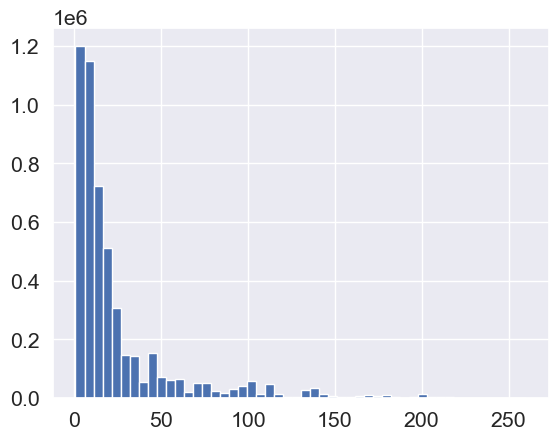

In [6]:
nhts_routes_crossed = \
nhts_routes_out.loc[nhts_routes_out['st_code'] != nhts_routes_out['orig_st_code']]
nhts_routes_crossed.loc[:, 'distance'] = nhts_routes_crossed.loc[:, 'distance'].fillna(300)
nhts_routes_crossed = nhts_routes_crossed.sort_values(by = 'distance')
nhts_routes_shortest = \
nhts_routes_crossed.groupby(['populationGroupType',
                             'orig_geoid', 'orig_st_code',
                             'dest_geoid', 'dest_st_code',
                             'wtperfin']).first().reset_index()
print(len(nhts_routes_shortest))
nhts_routes_shortest.head(5)
nhts_routes_shortest.distance.hist(bins = 50,
                                  weights=nhts_routes_shortest["wtperfin"])

In [7]:
# nhts_routes_shortest.head(5)
distance_bin = [-1, 5, 10, 20, 50, 100, 300]
distance_bin_label = ['bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6']
nhts_routes_shortest.loc[:, 'dist_bin'] = pd.cut(nhts_routes_shortest.loc[:, 'distance'],
                                            bins = distance_bin,
                                            labels = distance_bin_label,
                                            ordered = False)
trip_count_by_bin = \
nhts_routes_shortest.groupby(['populationGroupType', 'dist_bin'])[['wtperfin']].sum()
trip_count_by_bin = trip_count_by_bin.reset_index()
trip_count_by_bin.loc[:, 'fraction'] = \
trip_count_by_bin.loc[:, 'wtperfin'] / \
trip_count_by_bin.groupby('populationGroupType')['wtperfin'].transform('sum')
trip_count_by_bin = trip_count_by_bin[['populationGroupType', 'dist_bin', 'fraction']]
trip_count_by_bin.to_csv('state_spillover/home_based_border_fraction.csv')

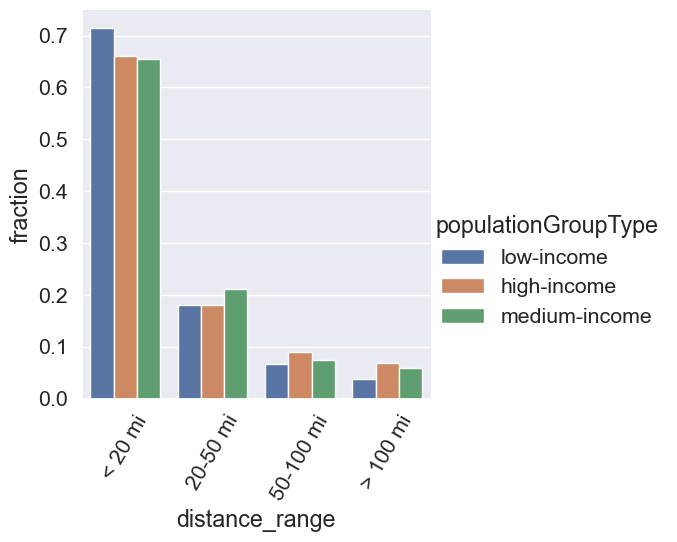

In [12]:
# bin 1 = 0-5 mile, bin 2 = 5-10 mile, bin 3 = 10-20 mile, 
# bin 4 = 20-50 mile, bin 5 = 50 -100 mile, bin 6 = >100  mile
distance_bin_lookup = {'bin1': '< 20 mi', 
                       'bin2': '< 20 mi',
                       'bin3': '< 20 mi',
                       'bin4': '20-50 mi', 
                       'bin5': '50-100 mi', 
                       'bin6': '> 100 mi'}
trip_count_by_bin.loc[:, 'distance_range'] = \
trip_count_by_bin.loc[:, 'dist_bin'].map(distance_bin_lookup)

trip_count_by_bin_plot = \
trip_count_by_bin.groupby(['populationGroupType', 'distance_range'])[['fraction']].sum()
trip_count_by_bin_plot = trip_count_by_bin_plot.reset_index()
trip_count_by_bin_plot = trip_count_by_bin_plot.sort_values(by = 'fraction', 
                                                            ascending = False)
sns.catplot(data = trip_count_by_bin_plot, 
            x="distance_range", 
            y="fraction", 
            hue="populationGroupType",
            kind = 'bar')
plt.xticks(rotation = 60)
plt.savefig('state_spillover/home_based_trip_border_frac_labeled.png', 
            dpi = 300, bbox_inches = 'tight')